# Comparision of regularization techniques

## Part 1: Best Subset, Forward, and Backward Selection

## Part 2: Ridge, Lasso, PCR


# Part 1: Best Subset, Forward, and Backward Selection Methods

In [49]:
toyota.df <- read.csv("ToyotaCorolla.csv") 

In [50]:
head(toyota.df[,"Cylinders"])

[1] 4 4 4 4 4 4

In [51]:
# Id	Record_ID
# Model	Model Description
# Price	Offer Price in EUROs
# Age_08_04	Age in months as in August 2004
# Mfg_Month	Manufacturing month (1-12)
# Mfg_Year	Manufacturing Year
# KM	Accumulated Kilometers on odometer
# Fuel_Type	Fuel Type (Petrol, Diesel, CNG)
# HP	Horse Power
# Met_Color	Metallic Color?  (Yes=1, No=0)
# Color	Color (Blue, Red, Grey, Silver, Black, etc.)
# Automatic	Automatic ( (Yes=1, No=0)
# CC	Cylinder Volume in cubic centimeters
# Doors	Number of doors
# Cylinders	Number of cylinders
# Gears	Number of gear positions
# Quarterly_Tax	Quarterly road tax in EUROs
# Weight	Weight in Kilograms
# Mfr_Guarantee	Within Manufacturer's Guarantee period  (Yes=1, No=0)
# BOVAG_Guarantee	BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
# Guarantee_Period	Guarantee period in months
# ABS	Anti-Lock Brake System (Yes=1, No=0)
# Airbag_1	Driver_Airbag  (Yes=1, No=0)
# Airbag_2	Passenger Airbag  (Yes=1, No=0)
# Airco	Airconditioning  (Yes=1, No=0)
# Automatic_airco	Automatic Airconditioning  (Yes=1, No=0)
# Boardcomputer	Boardcomputer  (Yes=1, No=0)
# CD_Player	CD Player  (Yes=1, No=0)
# Central_Lock	Central Lock  (Yes=1, No=0)
# Powered_Windows	Powered Windows  (Yes=1, No=0)
# Power_Steering	Power Steering  (Yes=1, No=0)
# Radio	Radio  (Yes=1, No=0)
# Mistlamps	Mistlamps  (Yes=1, No=0)
# Sport_Model	Sport Model  (Yes=1, No=0)
# Backseat_Divider	Backseat Divider  (Yes=1, No=0)
# Metallic_Rim	Metallic Rim  (Yes=1, No=0)
# Radio_cassette	Radio Cassette  (Yes=1, No=0)
# Parking_Assistant	Parking assistance system  (Yes=1, No=0)
# Tow_Bar	Tow Bar  (Yes=1, No=0)


We want to build a regression model for Price

In [52]:
dim(toyota.df)[1]

[1] 1436

In [53]:
set.seed(1)  # set seed for reproducing the partition
drops <- c("Model","Id", "Mfg_Year", "Cylinders")
toyota.df <- toyota.df[ , !(names(toyota.df) %in% drops)]
train.index <- sample(dim(toyota.df)[1], dim(toyota.df)[1]*2/3)  
train.df <- toyota.df[train.index, ]
valid.df <- toyota.df[-train.index, ]

In [54]:
dim(toyota.df)

[1] 1436   34

In [55]:
dim(train.df)

[1] 957  34

In [56]:
dim(valid.df)

[1] 479  34

In [57]:
toyota.lm <- lm(Price ~ ., data = train.df)

In [58]:
summary(toyota.lm)


Call:
lm(formula = Price ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7580.9  -627.3    -6.0   642.9  5283.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.086e+02  1.921e+03   0.213 0.831573    
Age_08_04        -1.171e+02  4.330e+00 -27.042  < 2e-16 ***
Mfg_Month        -8.516e+01  1.135e+01  -7.503 1.48e-13 ***
KM               -1.585e-02  1.467e-03 -10.799  < 2e-16 ***
Fuel_TypeDiesel   1.254e+03  4.550e+02   2.757 0.005954 ** 
Fuel_TypePetrol   2.519e+03  4.679e+02   5.385 9.21e-08 ***
HP                2.177e+01  3.961e+00   5.496 5.04e-08 ***
Met_Color         1.513e+01  8.892e+01   0.170 0.864951    
ColorBlack        5.295e+02  6.621e+02   0.800 0.424076    
ColorBlue         5.735e+02  6.618e+02   0.867 0.386381    
ColorGreen        2.512e+02  6.639e+02   0.378 0.705260    
ColorGrey         6.698e+02  6.621e+02   1.012 0.312033    
ColorRed          2.930e+02  6.621e+02   0.443 0.658158    
Col

In [59]:
install.packages("leaps")

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [60]:
install.packages("forecast")

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘urca’




In [61]:
require(forecast)
require(leaps)

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: leaps



In [13]:
toyota.lm.pred <- predict(toyota.lm, valid.df)


In [14]:
options(scipen=999, digits = 0)
some.residuals <- valid.df$Price[1:20] - toyota.lm.pred[1:20]
data.frame("Predicted" = toyota.lm.pred[1:20], "Actual" = valid.df$Price[1:20],
    "Residual" = some.residuals)


,Predicted,Actual,Residual
,<dbl>,<int>,<dbl>
1,15446,13500,-1946
2,15038,13750,-1288
4,15310,14950,-360
9,18281,21500,3219
10,13653,12950,-703
12,20801,19950,-851
16,21176,22000,824
18,15671,17950,2279
26,18301,15950,-2351


In [15]:
options(scipen=999, digits = 3)
# use accuracy() to compute common accuracy measures.
accuracy(toyota.lm.pred, valid.df$Price)

ERROR: Error in accuracy(toyota.lm.pred, valid.df$Price): could not find function "accuracy"


In [16]:
?accuracy

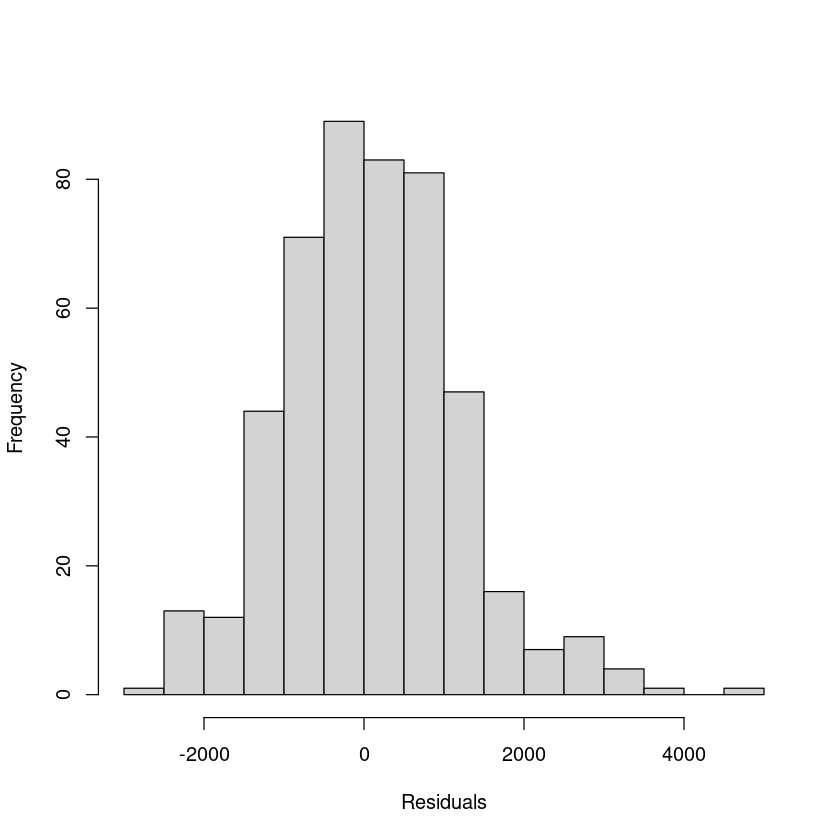

In [17]:
all.residuals <- valid.df$Price - toyota.lm.pred
hist(all.residuals, breaks = 25, xlab = "Residuals", main = "")

Classwork: use the leaps library (notebook 9b) to reduce the number of features using best subset, forward, backward. Report your findings.

# Best Subset

### Using full dataset and comparing BIC, Adj R2, etc.

In [18]:
library(leaps)

regfit.full= regsubsets(Price ~ ., data = toyota.df, nvmax = ncol(train.df))
reg.summary=summary(regfit.full)

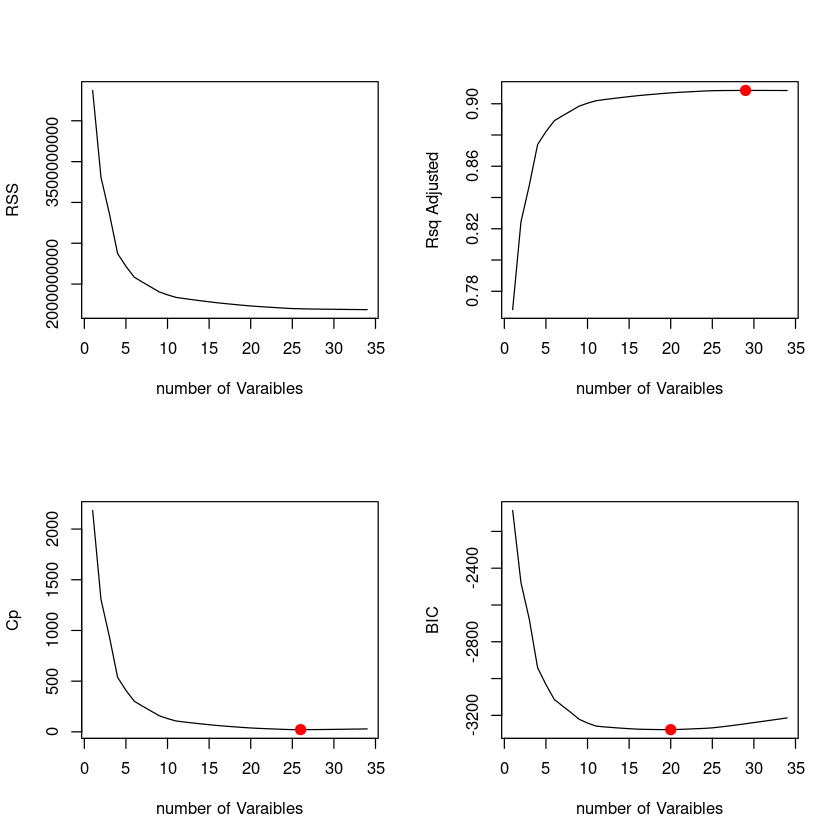

In [19]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="number of Varaibles",ylab="RSS",type="l")
plot(reg.summary$adjr2, xlab="number of Varaibles",ylab="Rsq Adjusted",type="l")
ind<-which.max(reg.summary$adjr2)
points(ind,reg.summary$adjr2[ind],col="red",cex=2,pch=20) #plot a red dot at maximum Adjusted R2

plot(reg.summary$cp, xlab="number of Varaibles",ylab="Cp",type="l")
ind<-which.min(reg.summary$cp) # find the location of the minimum Cp
points(ind,reg.summary$cp[ind],col="red",cex=2,pch=20) #plot a red dot at minimum Cp

plot(reg.summary$bic, xlab="number of Varaibles",ylab="BIC",type="l")
ind<-which.min(reg.summary$bic) # find the location of the minimum BIC
points(ind,reg.summary$bic[ind],col="red",cex=2,pch=20) #plot a red dot at minimum BIC

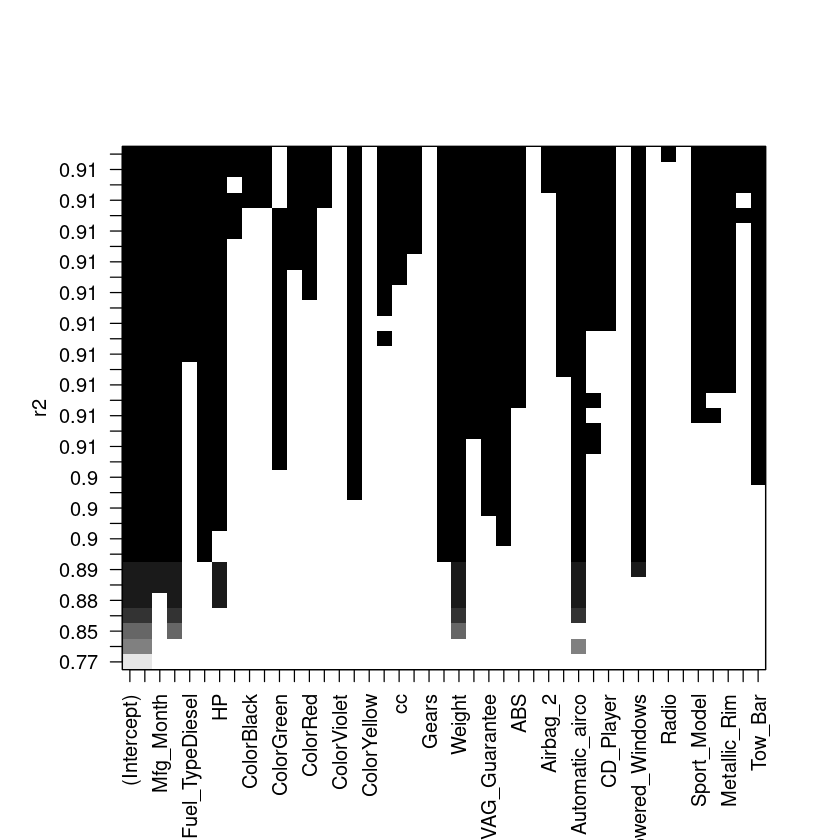

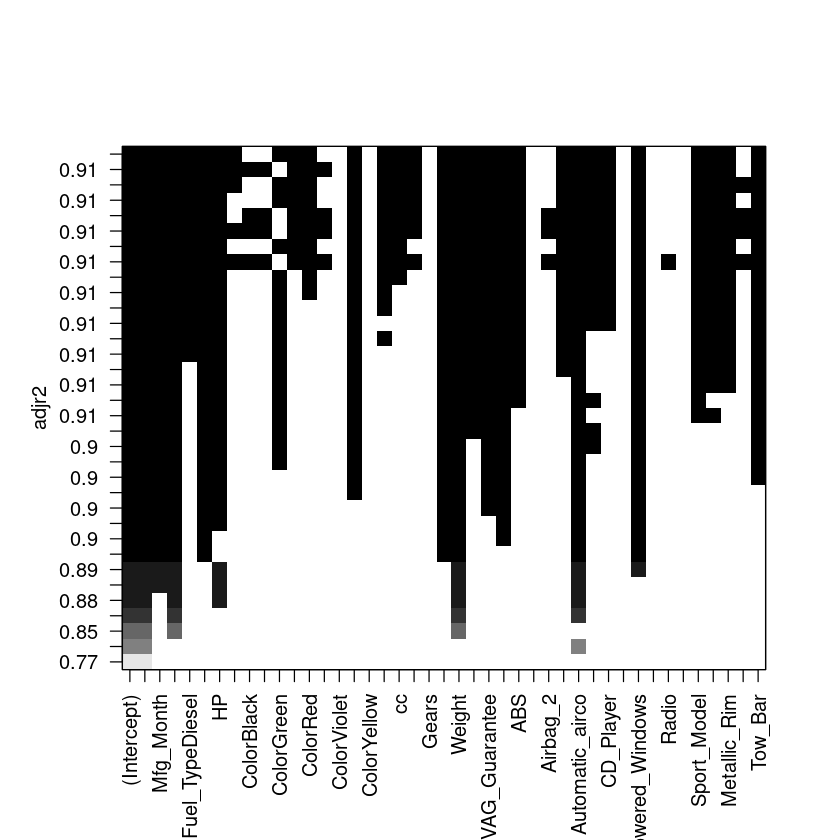

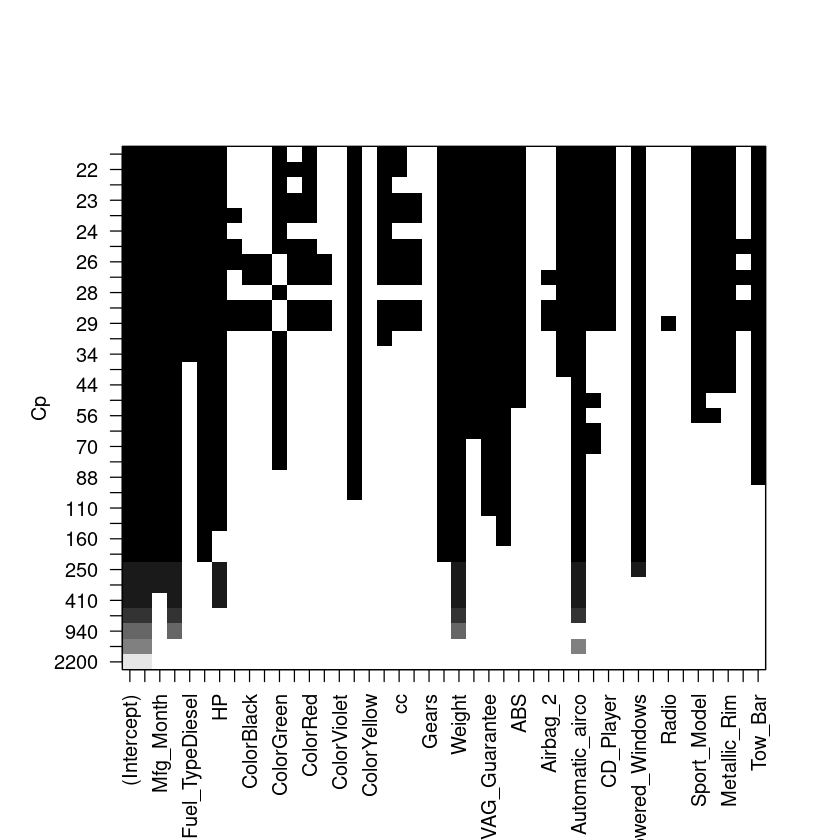

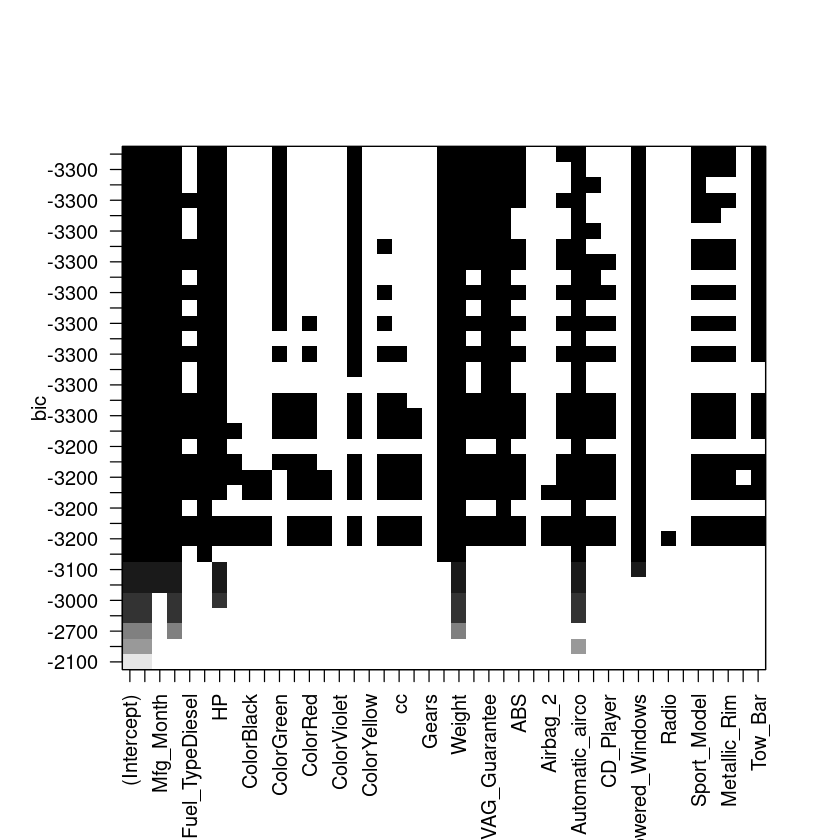

In [20]:
plot(regfit.full,scale="r2")
plot(regfit.full,scale="adjr2")
plot(regfit.full,scale="Cp")
plot(regfit.full,scale="bic")

In [21]:
reg.summary$adjr2

[1] 0.768 0.824 0.848 0.874 0.882 0.889 0.892 0.895 0.898 0.900 0.902 0.903
[13] 0.903 0.904 0.905 0.905 0.906 0.906 0.907 0.907 0.907 0.908 0.908 0.908
[25] 0.908 0.908 0.908 0.909 0.909 0.909 0.909 0.908 0.908 0.908

In [22]:
max(reg.summary$adjr2)

[1] 0.909

In [23]:
which.max(reg.summary$adjr2)

[1] 29

In [24]:
coef(regfit.full, 29)

(Intercept)        Age_08_04        Mfg_Month               KM 
       1597.1750        -118.2017         -95.8669          -0.0164 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP        Met_Color 
        994.8419        2034.8584          20.1204         -76.3454 
      ColorGreen        ColorGrey         ColorRed       ColorWhite 
       -277.6820         102.7411        -156.3747        -796.0842 
       Automatic               cc            Doors    Quarterly_Tax 
        336.9385          -0.1103          43.0186          13.9134 
          Weight    Mfr_Guarantee  BOVAG_Guarantee Guarantee_Period 
         10.7975         235.2541         487.2549          64.6858 
             ABS            Airco  Automatic_airco    Boardcomputer 
       -298.7940         202.8827        2377.7130        -300.4366 
       CD_Player  Powered_Windows      Sport_Model Backseat_Divider 
        216.1834         323.7027         310.4585        -290.2434 
    Metallic_Rim          Tow_Bar 
        210.8253        -196.3674

In [25]:
min(reg.summary$bic)

[1] -3278

In [26]:
which.min(reg.summary$bic)

[1] 20

In [27]:
coef(regfit.full, 19)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -220.2836        -115.0367         -93.5938          -0.0163 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
       1517.1986          14.6471        -244.4465        -768.6025 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         13.8541          13.2752         219.9800         515.3576 
Guarantee_Period              ABS  Automatic_airco  Powered_Windows 
         69.5144        -244.2269        2414.8328         402.2688 
     Sport_Model Backseat_Divider     Metallic_Rim          Tow_Bar 
        293.1642        -320.4544         230.3704        -206.0084

### Using Validation Set Approach

In [62]:
?sample

In [95]:
set.seed(1)
train=sample(x = c(TRUE,FALSE),size = nrow(toyota.df),rep=TRUE) 
test=(!train)

[1] 2775217 2224534 2592695 2121007 1884390 1795175 1672420 1742966 1624309
[10] 1589497 1602178 1619096 1601223 1608328 1605717 1610533 1889258 1941554
[19] 3402573 3309711 3296651 3290136 3122618 3160636 3213671 3049777 3073243
[28] 3004547 3026757 3062262 3035195 3033869 3032943 3032258

[1] 10

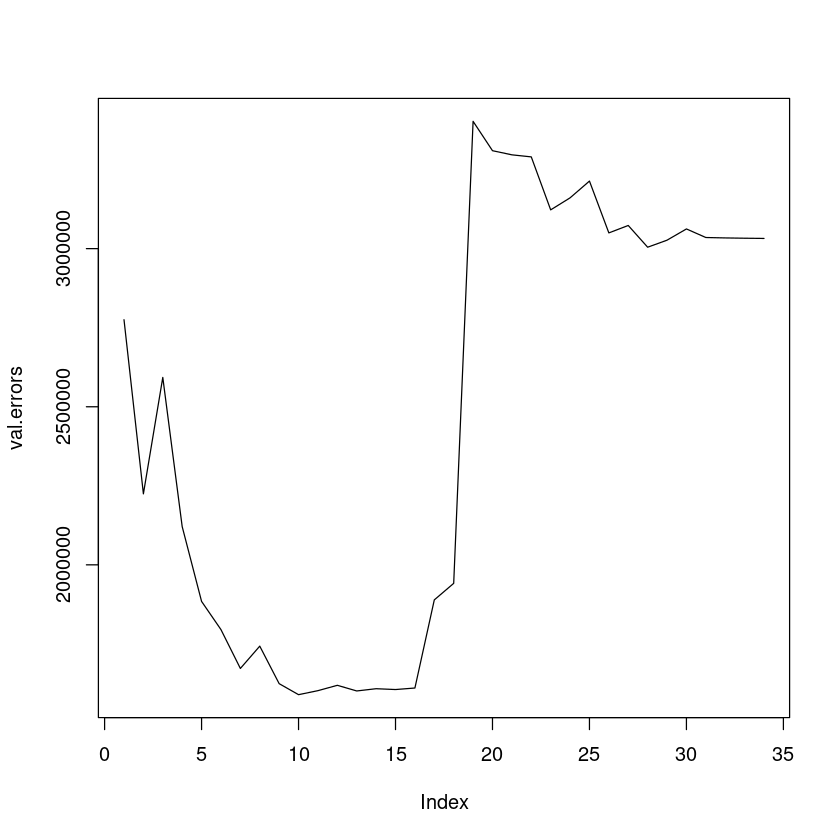

In [96]:
regfit.best.train=regsubsets(Price~.,data=toyota.df[train,],nvmax=ncol(toyota.df)) 

test.mat=model.matrix(Price~.,data=toyota.df[test,]) 

val.errors=rep(NA,ncol(toyota.df))

for(i in 1:34){ 
    coefi=coef(regfit.best.train,id=i) 
    pred=test.mat[,names(coefi)]%*%coefi  
    val.errors[i]=mean((toyota.df$Price[test]-as.vector(pred))^2) 
    }
val.errors

which.min(val.errors)

plot(val.errors,type="l")

In [189]:
## Use findings from validation approach to full model to find coefficients:
coef (regfit.full, 10)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -493.2569        -114.0995         -90.0826          -0.0164 
 Fuel_TypePetrol               HP    Quarterly_Tax           Weight 
       1734.3813          14.2874          14.7072          13.3598 
Guarantee_Period  Automatic_airco  Powered_Windows 
         66.9755        2659.2776         422.4618

# Forward

### Using full dataset and comparing BIC, Adj R2, etc.

In [98]:
regfit.fwd=regsubsets(Price~.,data=toyota.df,nvmax=ncol(toyota.df),method="forward")
regfit.fwd.sum = summary(regfit.fwd)


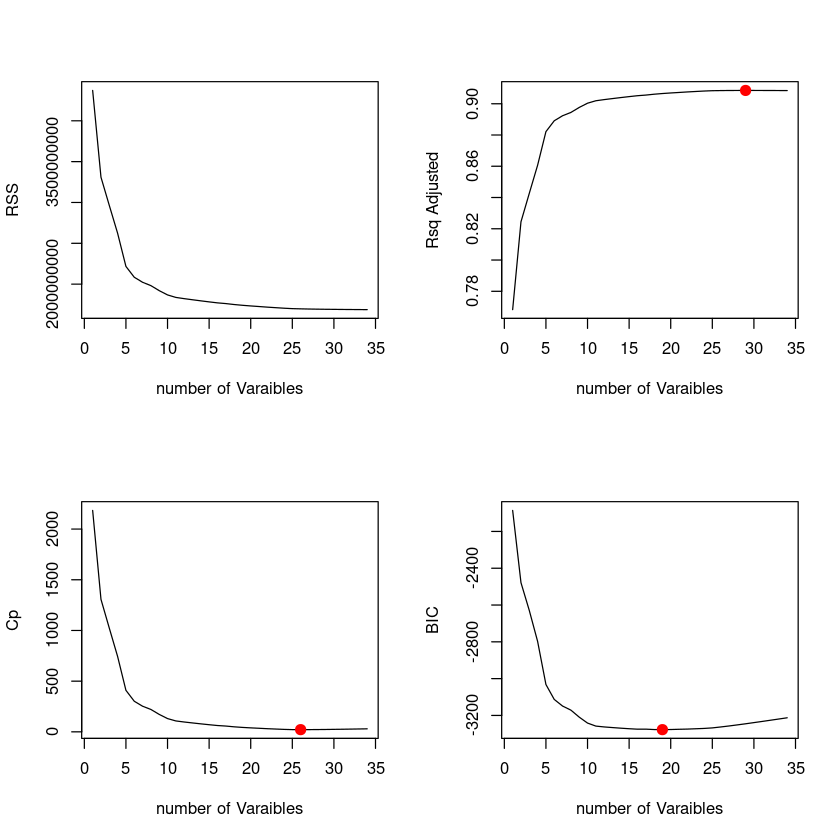

In [99]:
par(mfrow=c(2,2))
plot(regfit.fwd.sum$rss, xlab="number of Varaibles",ylab="RSS",type="l")
plot(regfit.fwd.sum$adjr2, xlab="number of Varaibles",ylab="Rsq Adjusted",type="l")
ind<-which.max(regfit.fwd.sum$adjr2)
points(ind,regfit.fwd.sum$adjr2[ind],col="red",cex=2,pch=20) #plot a red dot at maximum Adjusted R2

plot(regfit.fwd.sum$cp, xlab="number of Varaibles",ylab="Cp",type="l")
ind<-which.min(regfit.fwd.sum$cp) # find the location of the minimum Cp
points(ind,regfit.fwd.sum$cp[ind],col="red",cex=2,pch=20) #plot a red dot at minimum Cp

plot(regfit.fwd.sum$bic, xlab="number of Varaibles",ylab="BIC",type="l")
ind<-which.min(regfit.fwd.sum$bic) # find the location of the minimum BIC
points(ind,regfit.fwd.sum$bic[ind],col="red",cex=2,pch=20) #plot a red dot at minimum BIC

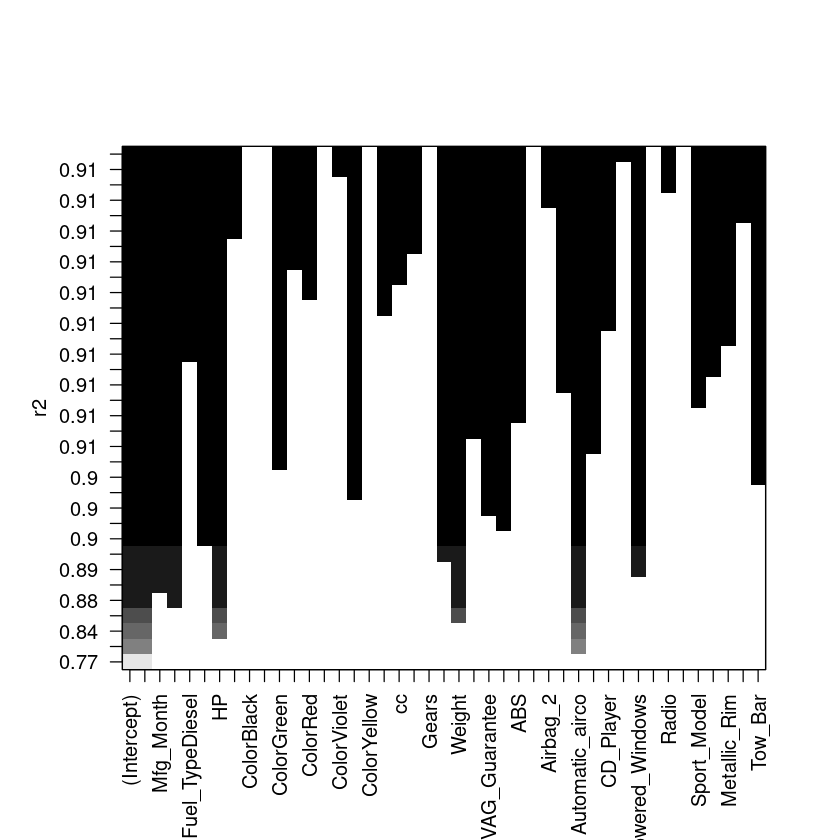

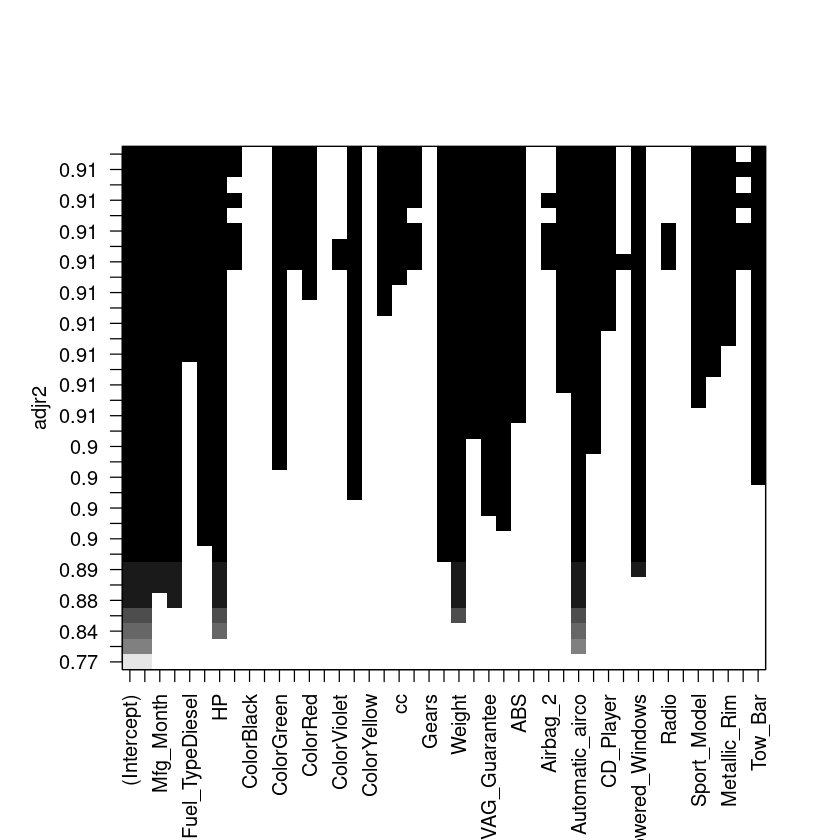

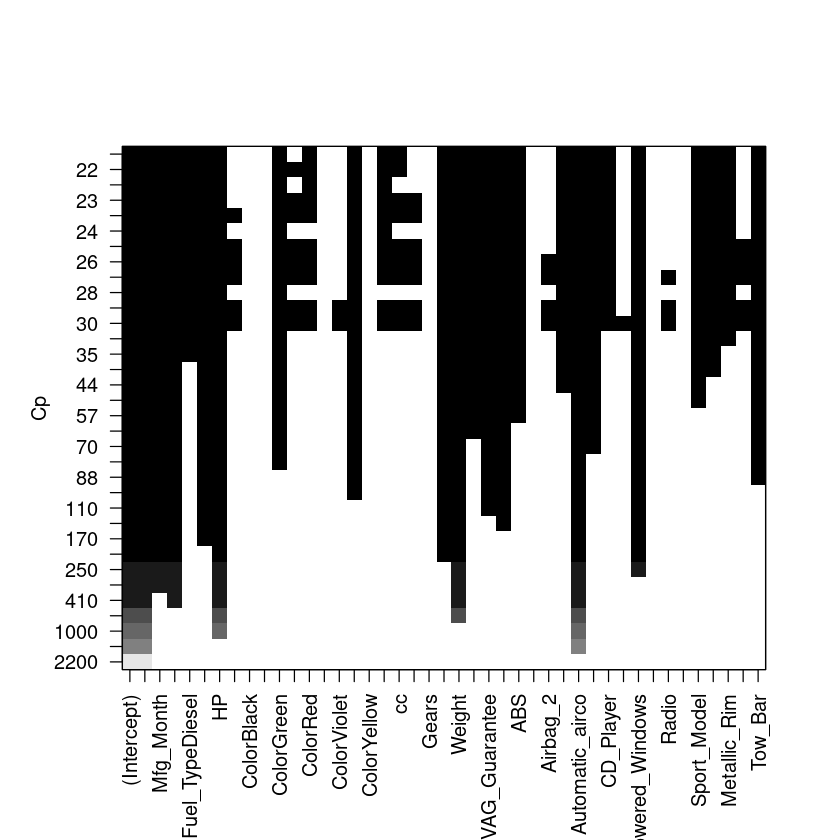

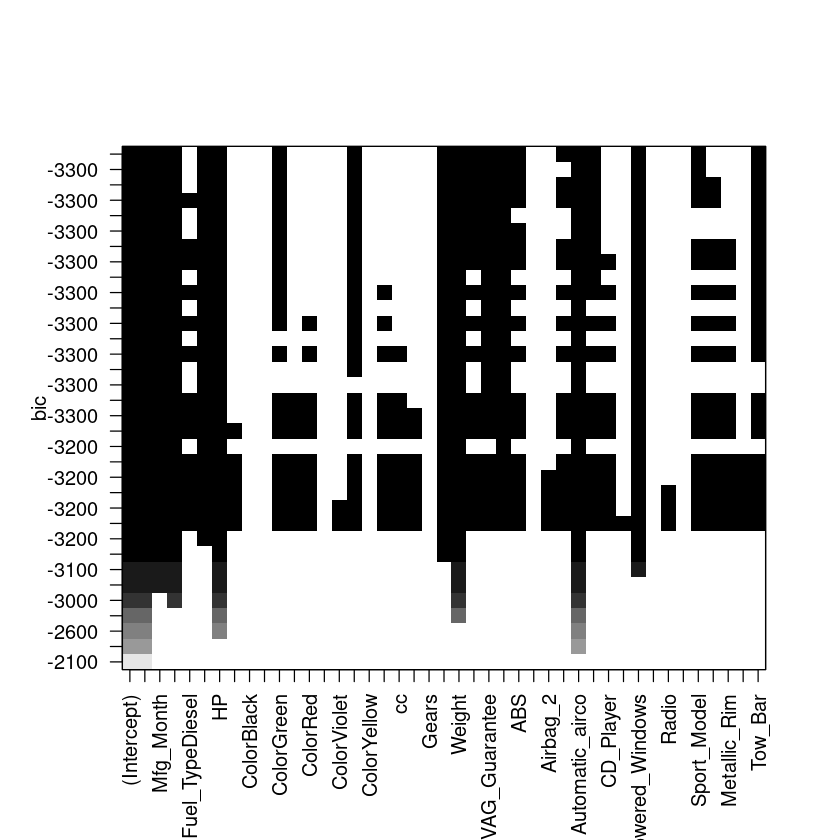

In [100]:
plot(regfit.fwd,scale="r2")
plot(regfit.fwd,scale="adjr2")
plot(regfit.fwd,scale="Cp")
plot(regfit.fwd,scale="bic")

In [101]:
max(regfit.fwd.sum$adjr2)

[1] 0.909

In [102]:
which.max(regfit.fwd.sum$adjr2)

[1] 29

In [103]:
coef(regfit.fwd, 29)

(Intercept)        Age_08_04        Mfg_Month               KM 
       1597.1750        -118.2017         -95.8669          -0.0164 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP        Met_Color 
        994.8419        2034.8584          20.1204         -76.3454 
      ColorGreen        ColorGrey         ColorRed       ColorWhite 
       -277.6820         102.7411        -156.3747        -796.0842 
       Automatic               cc            Doors    Quarterly_Tax 
        336.9385          -0.1103          43.0186          13.9134 
          Weight    Mfr_Guarantee  BOVAG_Guarantee Guarantee_Period 
         10.7975         235.2541         487.2549          64.6858 
             ABS            Airco  Automatic_airco    Boardcomputer 
       -298.7940         202.8827        2377.7130        -300.4366 
       CD_Player  Powered_Windows      Sport_Model Backseat_Divider 
        216.1834         323.7027         310.4584        -290.2434 
    Metallic_Rim          Tow_Bar 
        210.8253        -196.3674

In [104]:
min(regfit.fwd.sum$bic)

[1] -3277

In [105]:
which.min(regfit.fwd.sum$bic)

[1] 19

In [106]:
coef(regfit.fwd, 19)

(Intercept)        Age_08_04        Mfg_Month               KM 
        526.4640        -118.6876         -96.7254          -0.0165 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
       1321.5920          15.8450        -276.6104        -732.9500 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         12.4103          12.8735         208.6081         460.9632 
Guarantee_Period              ABS            Airco  Automatic_airco 
         76.8775        -296.0319         209.4591        2467.2809 
   Boardcomputer  Powered_Windows      Sport_Model          Tow_Bar 
       -310.3322         350.0347         228.1704        -212.8014

### Using Validation Set Approach

[1] 2775217 2224534 2035580 1758685 1884390 1795175 1672420 1629174 1624309
[10] 1589497 1602178 1619096 1601223 1608328 1605717 1610533 1637296 1852120
[19] 1896415 1871921 2094549 3116062 3122618 3160636 3092204 3056960 3081553
[28] 3112755 3090254 3119731 3134362 3071790 3068993 3067199

[1] 10

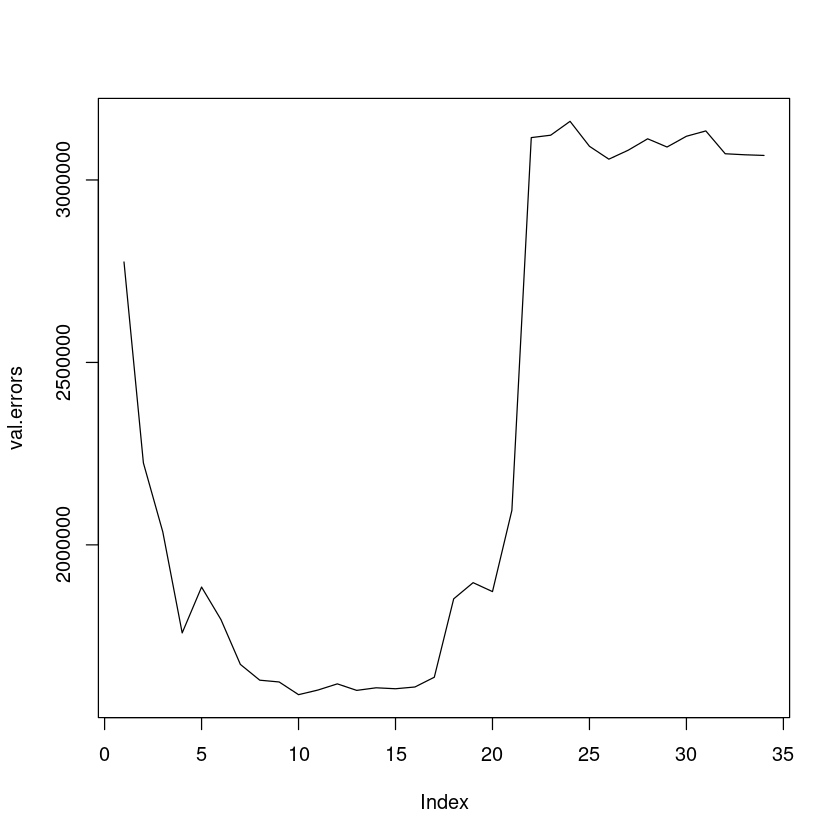

In [107]:
regfit.fwd.train=regsubsets(Price~.,data=toyota.df[train,],nvmax=ncol(toyota.df), method="forward") 

test.mat=model.matrix(Price~.,data=toyota.df[test,], method="forward") 

val.errors=rep(NA,ncol(toyota.df))

for(i in 1:34){ 
    coefi=coef(regfit.fwd.train,id=i) 
    pred=test.mat[,names(coefi)]%*%coefi  
    val.errors[i]=mean((toyota.df$Price[test]-as.vector(pred))^2) 
    }
val.errors

which.min(val.errors)

plot(val.errors,type="l")

In [190]:
## Use findings from validation approach to full model to find coefficients:
coef (regfit.fwd, 10)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -493.2569        -114.0995         -90.0826          -0.0164 
 Fuel_TypePetrol               HP    Quarterly_Tax           Weight 
       1734.3813          14.2874          14.7072          13.3598 
Guarantee_Period  Automatic_airco  Powered_Windows 
         66.9755        2659.2776         422.4618

# Backward

### Using full dataset and comparing BIC, Adj R2, etc.

In [109]:
regfit.bwd=regsubsets(Price~.,data=toyota.df,nvmax=ncol(toyota.df),method="backward")
regfit.bwd.sum = summary(regfit.bwd)

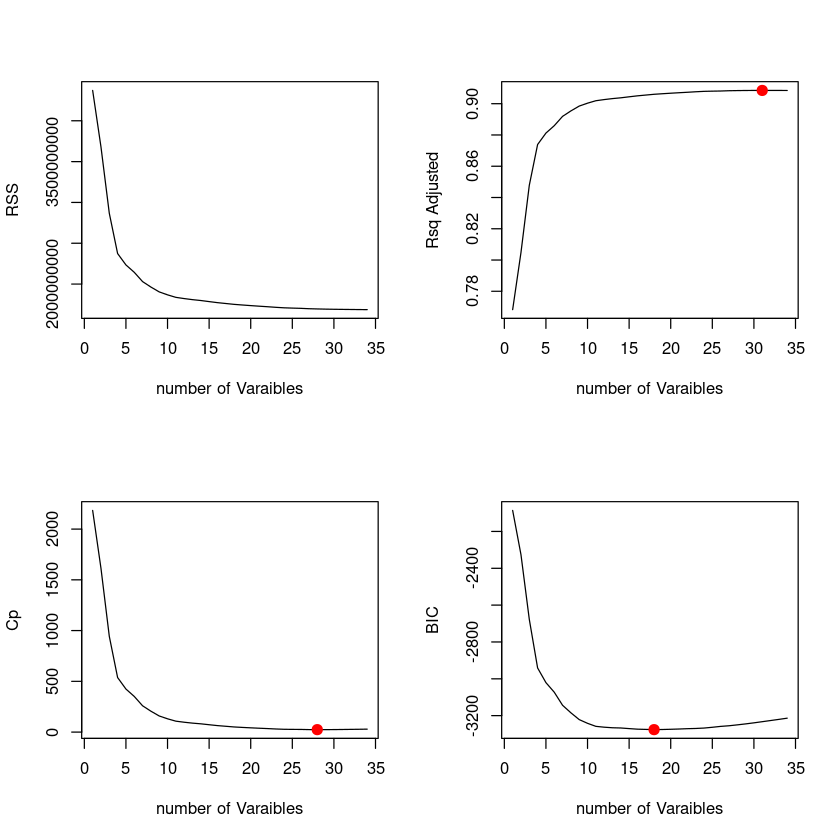

In [110]:
par(mfrow=c(2,2))
plot(regfit.bwd.sum$rss, xlab="number of Varaibles",ylab="RSS",type="l")
plot(regfit.bwd.sum$adjr2, xlab="number of Varaibles",ylab="Rsq Adjusted",type="l")
ind<-which.max(regfit.bwd.sum$adjr2)
points(ind,regfit.bwd.sum$adjr2[ind],col="red",cex=2,pch=20) #plot a red dot at maximum Adjusted R2

plot(regfit.bwd.sum$cp, xlab="number of Varaibles",ylab="Cp",type="l")
ind<-which.min(regfit.bwd.sum$cp) # find the location of the minimum Cp
points(ind,regfit.bwd.sum$cp[ind],col="red",cex=2,pch=20) #plot a red dot at minimum Cp

plot(regfit.bwd.sum$bic, xlab="number of Varaibles",ylab="BIC",type="l")
ind<-which.min(regfit.bwd.sum$bic) # find the location of the minimum BIC
points(ind,regfit.bwd.sum$bic[ind],col="red",cex=2,pch=20) #plot a red dot at minimum BIC

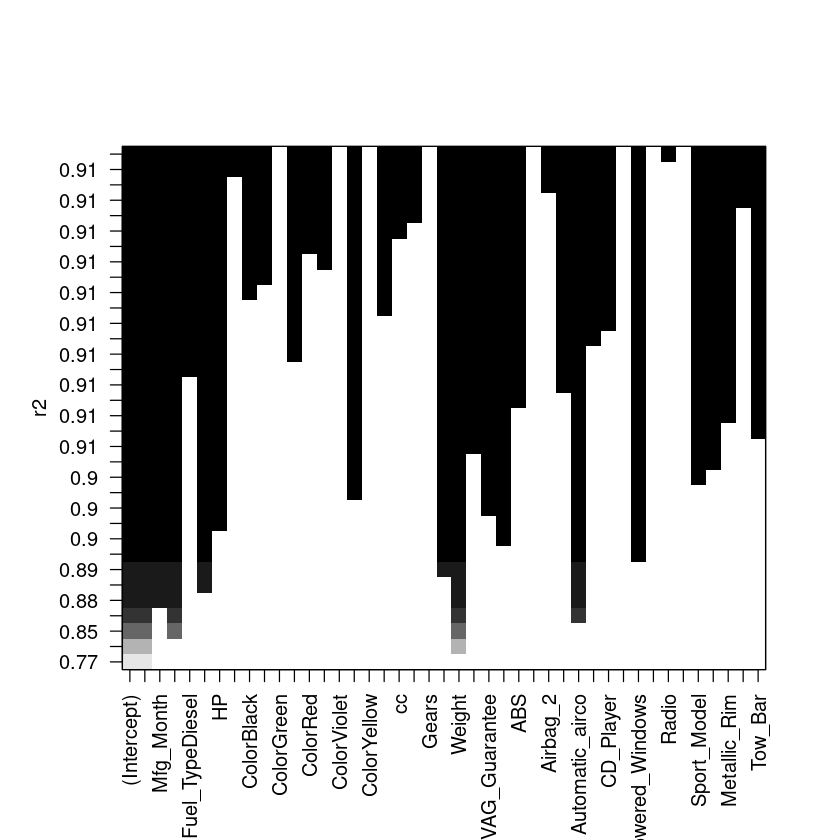

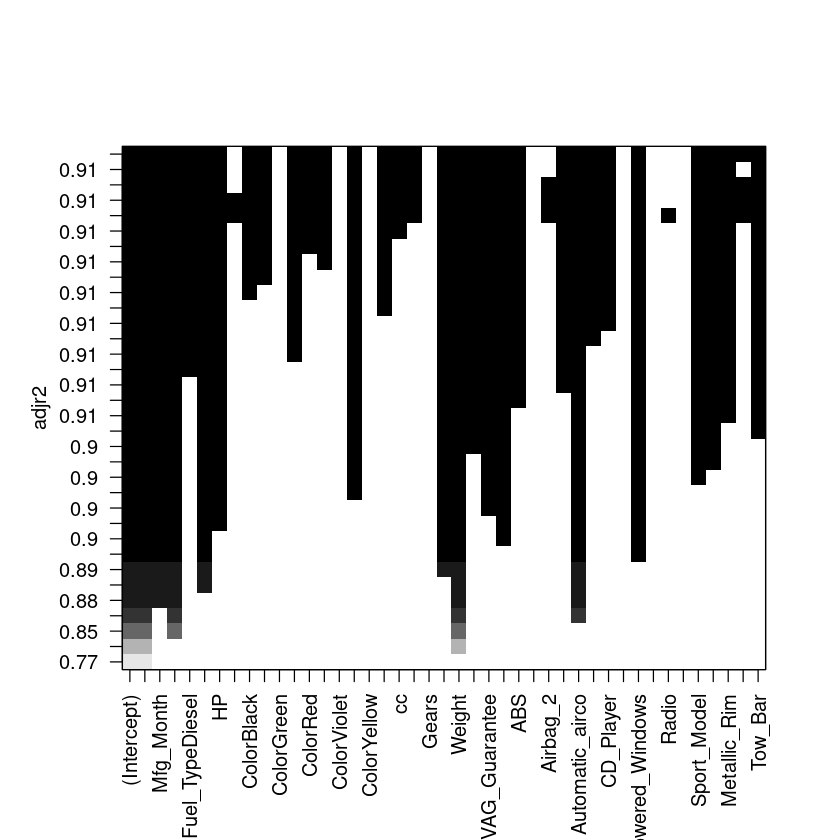

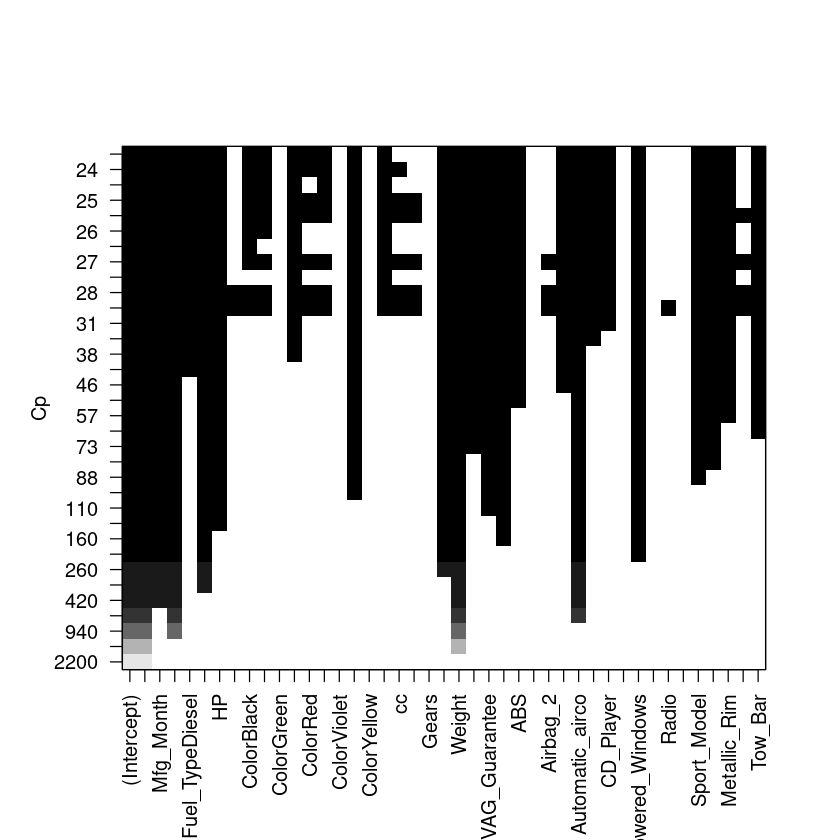

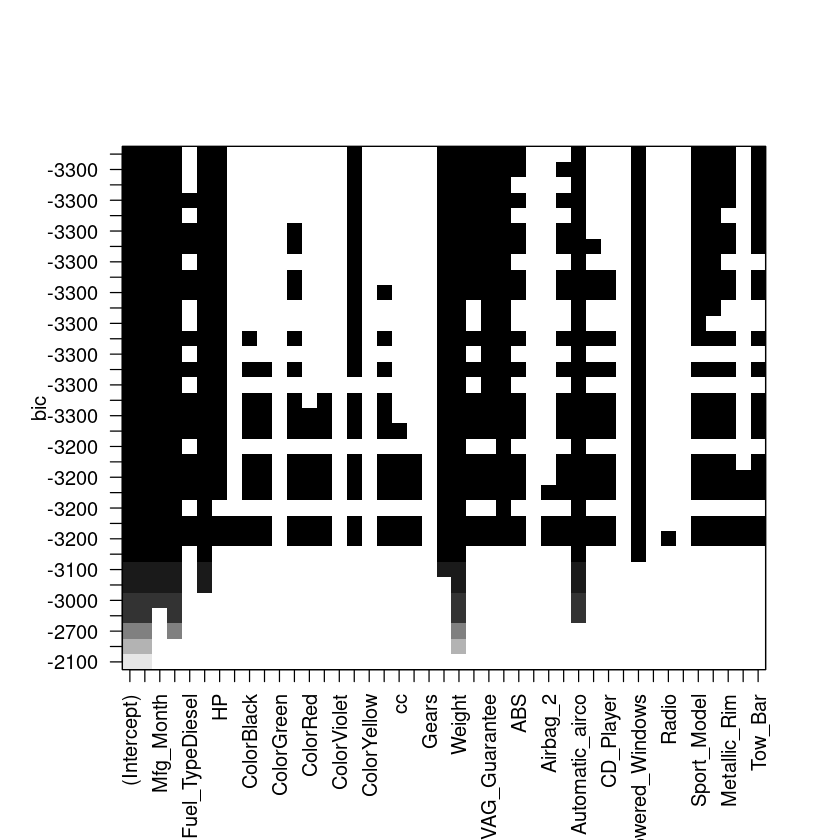

In [111]:
plot(regfit.bwd,scale="r2")
plot(regfit.bwd,scale="adjr2")
plot(regfit.bwd,scale="Cp")
plot(regfit.bwd,scale="bic")

In [112]:
max(regfit.bwd.sum$adjr2)

[1] 0.908

In [113]:
which.max(regfit.bwd.sum$adjr2)

[1] 31

In [114]:
coef (regfit.bwd, 31)

(Intercept)        Age_08_04        Mfg_Month               KM 
       1265.8267        -118.6253         -95.9762          -0.0164 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP       ColorBlack 
       1002.3023        2070.8092          20.1048         336.0463 
       ColorBlue        ColorGrey         ColorRed      ColorSilver 
        262.7533         388.5980         151.5590         308.4183 
      ColorWhite        Automatic               cc            Doors 
       -456.0713         338.7517          -0.1109          40.7078 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         14.0730          10.8011         228.0811         499.0420 
Guarantee_Period              ABS            Airco  Automatic_airco 
         65.8122        -294.2481         201.2964        2374.3175 
   Boardcomputer        CD_Player  Powered_Windows      Sport_Model 
       -305.6881         184.0514         313.4814         299.0524 
Backseat_Divider     Metallic_Rim   Radio_cassette          Tow_Bar 
       -303.9949         207.2901         -89.3073        -200.2093

In [115]:
min(regfit.bwd.sum$bic)

[1] -3276

In [116]:
which.min(regfit.bwd.sum$bic)

[1] 18

In [117]:
coef (regfit.bwd, 18)

(Intercept)        Age_08_04        Mfg_Month               KM 
        -57.5722        -115.9344         -93.2647          -0.0161 
 Fuel_TypePetrol               HP       ColorWhite    Quarterly_Tax 
       1529.1828          14.5101        -732.2057          13.9862 
          Weight    Mfr_Guarantee  BOVAG_Guarantee Guarantee_Period 
         13.1147         212.5513         521.1046          69.0696 
             ABS  Automatic_airco  Powered_Windows      Sport_Model 
       -254.1635        2444.0865         401.2972         307.3799 
Backseat_Divider     Metallic_Rim          Tow_Bar 
       -326.8409         238.3161        -201.6061

### Using Validation Set Approach

[1] 2775217 2577691 2592695 2121007 1884390 1795175 1764096 1742966 1624309
[10] 1643217 1655006 1947385 2361879 3942784 3927939 4350627 4304008 4087725
[19] 3916684 3925204 3607235 3524139 3258246 3167556 3213671 3187072 3147957
[28] 3004547 3026757 3062262 3035195 3033869 3032943 3032258

[1] 9

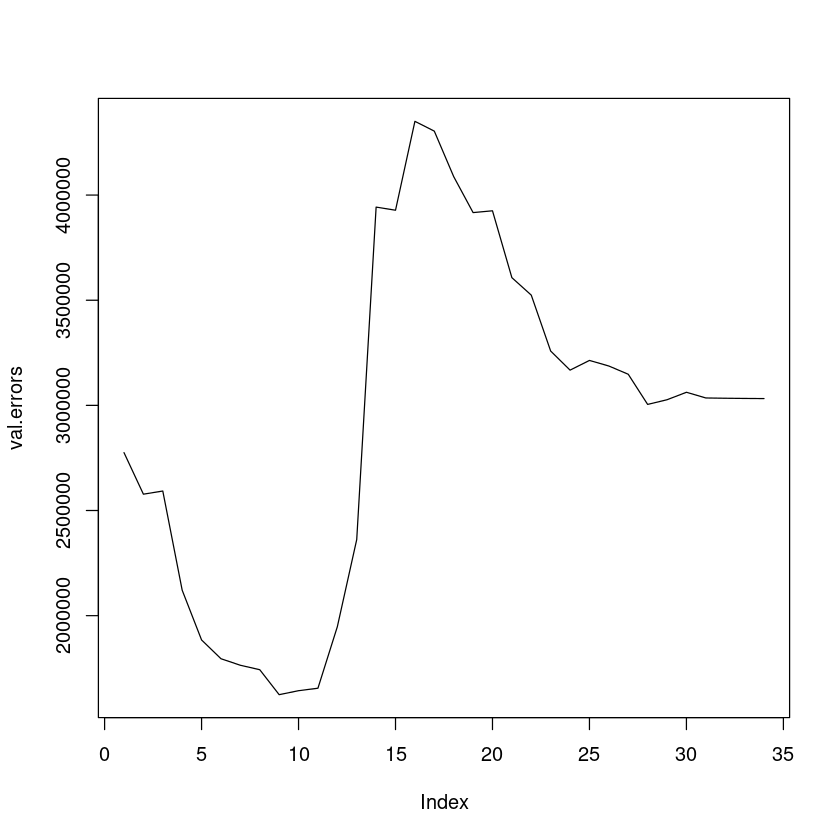

In [118]:
regfit.bwd.train=regsubsets(Price~.,data=toyota.df[train,],nvmax=ncol(toyota.df), method="backward") 

test.mat=model.matrix(Price~.,data=toyota.df[test,], method="backward") 

val.errors=rep(NA,ncol(toyota.df))

for(i in 1:34){ 
    coefi=coef(regfit.bwd.train,id=i) 
    pred=test.mat[,names(coefi)]%*%coefi  
    val.errors[i]=mean((toyota.df$Price[test]-as.vector(pred))^2) 
    }
val.errors

which.min(val.errors)

plot(val.errors,type="l")

In [191]:
## Use findings from validation approach to full model to find coefficients:
coef (regfit.bwd, 9)

(Intercept)        Age_08_04        Mfg_Month               KM 
      -1725.3778        -113.3025         -89.5159          -0.0162 
 Fuel_TypePetrol    Quarterly_Tax           Weight Guarantee_Period 
       2295.9852          15.3772          15.2526          71.2420 
 Automatic_airco  Powered_Windows 
       2735.1459         462.7860

# Summary of Findings

We see that the different subset selection methods produce different results in terms of finding the optimal subset, although they are generally close to eachother. 

As seen from class examples, different metrics such as BIC and Adjusted R2 arrive at different results.

We shouldn't use the regular R2 since that will always increase as we add more variables.

It makes sense for BIC to yield lower # of variables then other techniques since it has stronger penalty for additional variables.

When the optimal number of variables are the same, the different methods may produce different results, as expected. For example for # variables of 19 which minimize BIC for best subset and forward methods, we can see the following:

In [120]:
coef(regfit.fwd, 19)

(Intercept)        Age_08_04        Mfg_Month               KM 
        526.4640        -118.6876         -96.7254          -0.0165 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
       1321.5920          15.8450        -276.6104        -732.9500 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         12.4103          12.8735         208.6081         460.9632 
Guarantee_Period              ABS            Airco  Automatic_airco 
         76.8775        -296.0319         209.4591        2467.2809 
   Boardcomputer  Powered_Windows      Sport_Model          Tow_Bar 
       -310.3322         350.0347         228.1704        -212.8014

In [121]:
min(regfit.fwd.sum$bic)

[1] -3277

In [122]:
coef(regfit.full, 19)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -220.2836        -115.0367         -93.5938          -0.0163 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
       1517.1986          14.6471        -244.4465        -768.6025 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         13.8541          13.2752         219.9800         515.3576 
Guarantee_Period              ABS  Automatic_airco  Powered_Windows 
         69.5144        -244.2269        2414.8328         402.2688 
     Sport_Model Backseat_Divider     Metallic_Rim          Tow_Bar 
        293.1642        -320.4544         230.3704        -206.0084

In [123]:
min(reg.summary$bic)

[1] -3278

The best subset selection has a slightly lower BIC. This is because different combination of variables are included. For example, best subset selection has the "Metallic_Rim", while the forward selection has "Airco"

**Next**, when we look at the method that utilizes **validation set errors**, we see completely different set of results!

Best Subset Selection and Forward Selection result in a 10 variable optimal subset, while Backward Selection indicates that the validation error is minimized with 9 variables!

It is interesting to note that the selection of variables and their coefficient are identifical for the Best Subset Selectio and Forward Selection in the Validation method.

It is seen that higher number of variables using the Validation method (for example, over 15) result in extreme overfitting! This is contrary to the BIC, Adj R2, methods that use the full dataset.

### Recommendation

There are many ways to choose the best subset. However, from theory we know that best subset selection will produce the best result, since forward or backward selection may miss optimality. 

I would choose one of the two following models which are from the best subset selection:

In [124]:
coef(regfit.full, 19)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -220.2836        -115.0367         -93.5938          -0.0163 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
       1517.1986          14.6471        -244.4465        -768.6025 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
         13.8541          13.2752         219.9800         515.3576 
Guarantee_Period              ABS  Automatic_airco  Powered_Windows 
         69.5144        -244.2269        2414.8328         402.2688 
     Sport_Model Backseat_Divider     Metallic_Rim          Tow_Bar 
        293.1642        -320.4544         230.3704        -206.0084

The above minimizes the BIC in the entire set.

OR

In [201]:
coef (regfit.full, 10)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -493.2569        -114.0995         -90.0826          -0.0164 
 Fuel_TypePetrol               HP    Quarterly_Tax           Weight 
       1734.3813          14.2874          14.7072          13.3598 
Guarantee_Period  Automatic_airco  Powered_Windows 
         66.9755        2659.2776         422.4618

The above minimizes the error rate in the validation set. The results from the forward selection are also the same!

In [202]:
coef (regfit.fwd, 10)

(Intercept)        Age_08_04        Mfg_Month               KM 
       -493.2569        -114.0995         -90.0826          -0.0164 
 Fuel_TypePetrol               HP    Quarterly_Tax           Weight 
       1734.3813          14.2874          14.7072          13.3598 
Guarantee_Period  Automatic_airco  Powered_Windows 
         66.9755        2659.2776         422.4618

***It will be best to use Cross-Validation. I was unable to run it properly; however, that will produce more reliable or "stable" results than single validation set.***

# Part 2: Ridge & Lasso, and PCR

## Second part to be submitted.

# Ridge and Lasso

### SET UP

In [129]:
if (!require(glmnet)) install.packages("glmnet")
library(glmnet)

In [248]:
x=model.matrix(Price~.,toyota.df)[,-1] 
y=toyota.df$Price 

In [249]:
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda=grid) 

In [250]:
#ensures we are using same train/test split as subset selection methods
set.seed(1)
train=sample(x = c(TRUE,FALSE),size = nrow(toyota.df),rep=TRUE) 
test=(!train)

## RIDGE REG

Lets see how the variables behave:

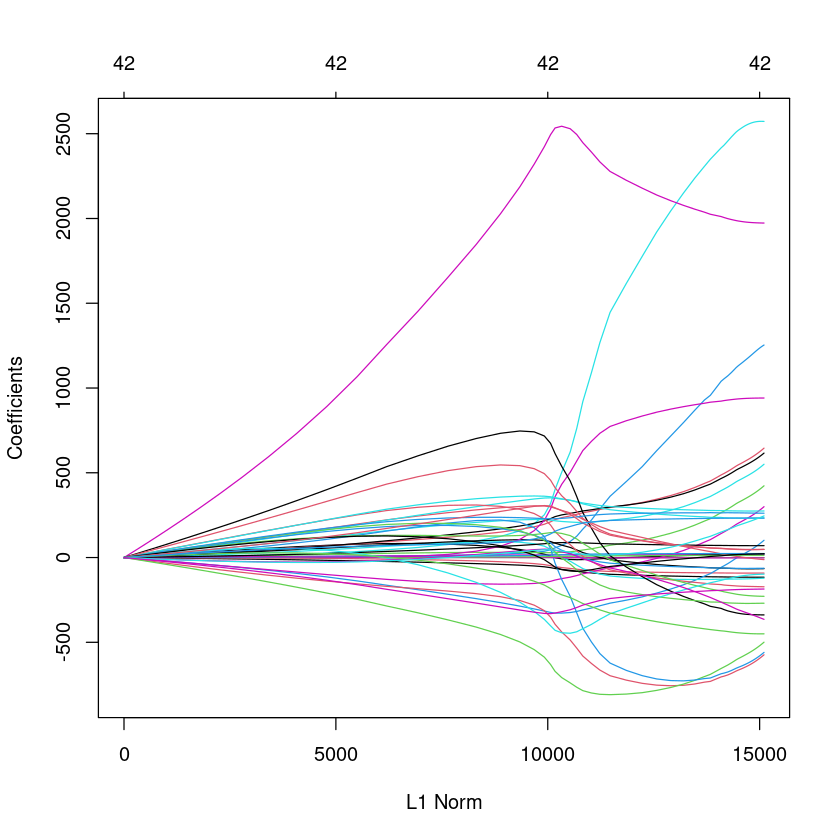

In [251]:
ridge.cv = glmnet(x[train,],y[train],alpha=0,lambda=grid)
plot(ridge.cv)

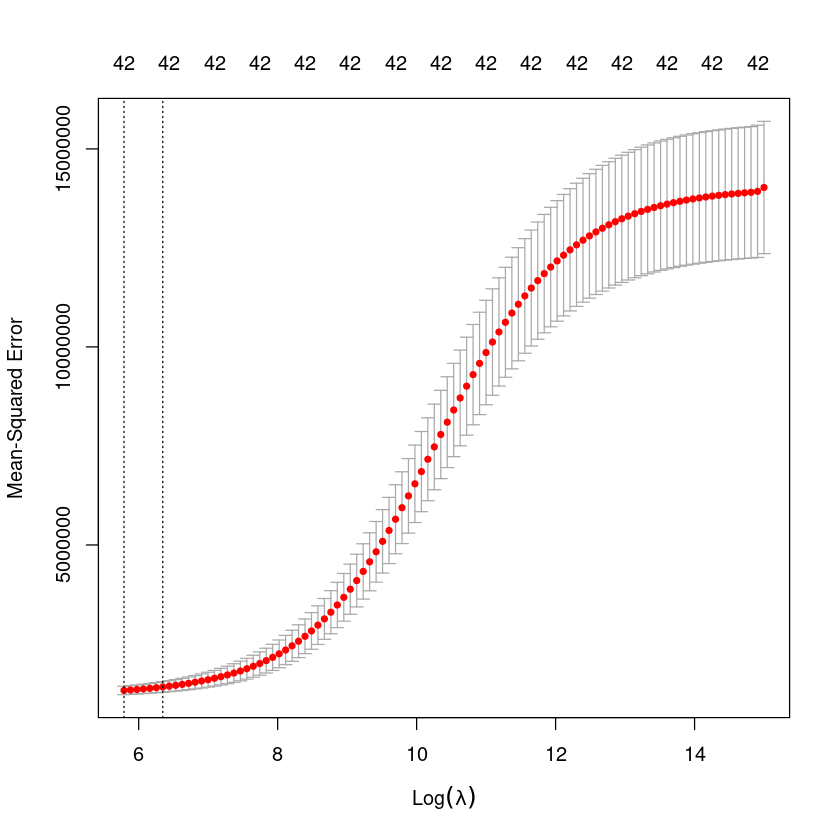

In [252]:
## Perform cross validation

set.seed(1) 
ridge.cv = cv.glmnet(x[train,], y[train], alpha=0, nfolds = 10, standardize = TRUE) 
plot(ridge.cv)

In [253]:
bestlam = ridge.cv$lambda.min 
bestlam

[1] 327

In [254]:
##MSE on test set

ridge.pred=predict(ridge.cv,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 1887376

In [255]:
##get coefficients from full dataset using optimal training lambda

cv.ridge.full = glmnet(x,y,alpha=0,lambda=grid)
predict(cv.ridge.full,type="coefficients",s=bestlam2)

43 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)       645.2090
Age_08_04        -117.5687
Mfg_Month         -94.8054
KM                 -0.0165
Fuel_TypeDiesel   886.5974
Fuel_TypePetrol  1955.6706
HP                 19.3863
Met_Color         -72.9827
ColorBlack        251.3121
ColorBlue         171.1222
ColorGreen        -78.0605
ColorGrey         305.9430
ColorRed           44.6180
ColorSilver       230.5169
ColorViolet      -233.7273
ColorWhite       -596.9423
ColorYellow      -180.1610
Automatic         347.1823
cc                 -0.1047
Doors              49.1067
Gears             150.3652
Quarterly_Tax      14.0185
Weight             10.8082
Mfr_Guarantee     241.0108
BOVAG_Guarantee   487.4028
Guarantee_Period   65.0668
ABS              -228.0715
Airbag_1           86.9098
Airbag_2         -112.4295
Airco             222.1787
Automatic_airco  2404.2114
Boardcomputer    -276.9293
CD_Player         209.3075
Central_Lock      -90.3421
Powered_Windo

## LASSO

Lets see how the variables behave:

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


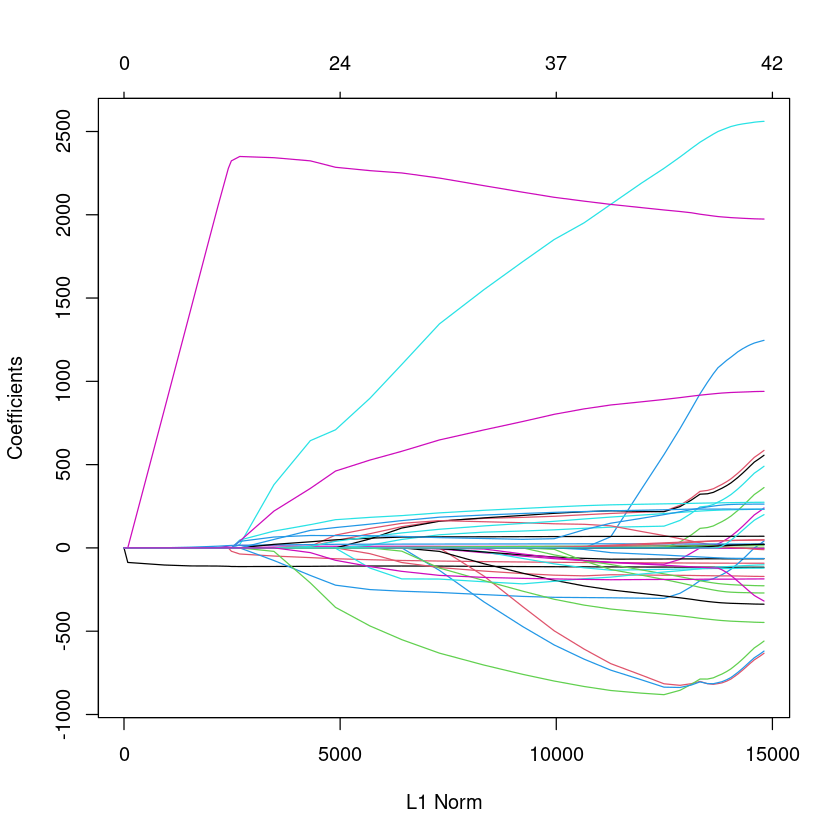

In [256]:
lasso.1 = glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.1)

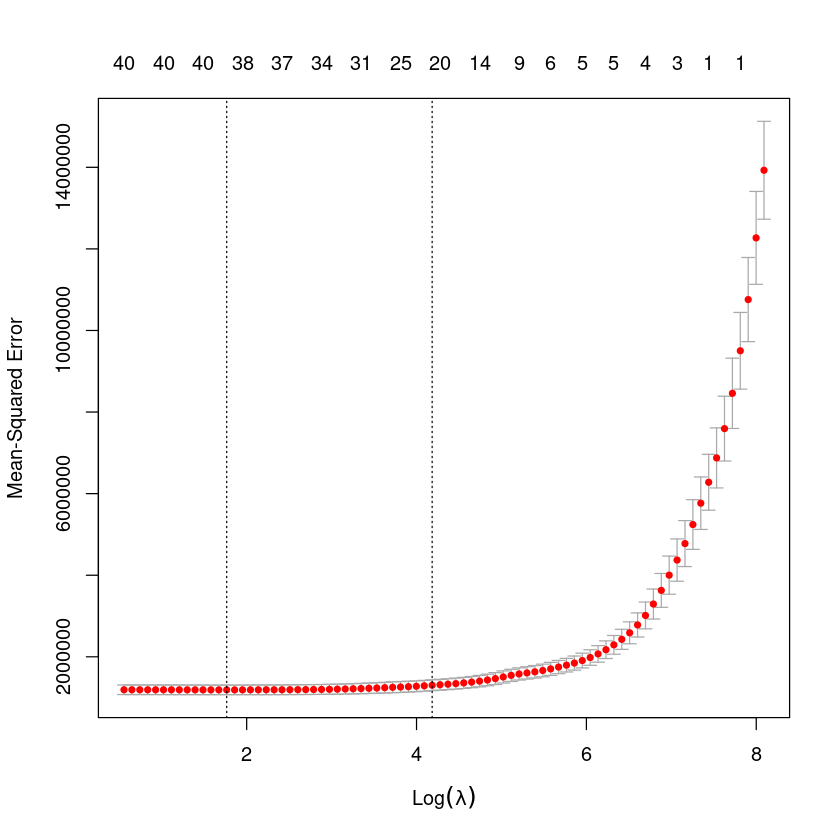

In [257]:
## Perform cross validation

cv.lasso = cv.glmnet(x[train,], y[train], alpha=1, nfolds = 10, standardize = TRUE) 
plot(cv.lasso)

In [258]:
bestlam2 = cv.lasso$lambda.min
bestlam2

[1] 5.84

In [260]:
##MSE on test set

lasso.pred=predict(cv.lasso,s=bestlam2,newx=x[test,])
mean((lasso.pred-y.test)^2)

[1] 2230717

In [214]:
##get coefficients from full dataset using optimal training lambda

cv.lasso.full = glmnet(x,y,alpha=1,lambda=grid)
predict(cv.lasso.full,type="coefficients",s=bestlam2)

43 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)       963.1243
Age_08_04        -117.2732
Mfg_Month         -92.8830
KM                 -0.0166
Fuel_TypeDiesel   531.8519
Fuel_TypePetrol  1590.1345
HP                 18.1768
Met_Color         -51.3111
ColorBlack         62.0611
ColorBlue           .     
ColorGreen       -229.3245
ColorGrey         127.3330
ColorRed         -102.3748
ColorSilver        55.9570
ColorViolet      -236.5987
ColorWhite       -727.6001
ColorYellow      -208.1788
Automatic         299.8565
cc                 -0.0728
Doors              37.0311
Gears             130.5457
Quarterly_Tax      12.9299
Weight             11.2599
Mfr_Guarantee     223.9668
BOVAG_Guarantee   466.8950
Guarantee_Period   64.4112
ABS              -216.5635
Airbag_1           53.4178
Airbag_2          -94.5467
Airco             196.4097
Automatic_airco  2396.2779
Boardcomputer    -244.0094
CD_Player         183.9135
Central_Lock       -1.5929
Powered_Windo

# PCR

In [81]:
if (!require(pls)) install.packages("pls")

library(pls)

In [82]:
#ensures we are using same train/test split as subset selection methods
set.seed(1)
train=sample(x = c(TRUE,FALSE),size = nrow(toyota.df),rep=TRUE) 
test=(!train)

In [83]:
set.seed(1)
pcr.fit=pcr(Price ~.,data=toyota.df,subset=train,scale=TRUE,validation="CV") 

In [84]:
summary(pcr.fit)

Data: 	X dimension: 709 42 
	Y dimension: 709 1
Fit method: svdpc
Number of components considered: 42

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3746     2596     2571     2393     1863     1849     1630
adjCV         3746     2592     2568     2391     1855     1846     1622
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1630     1606     1567      1564      1564      1555      1529
adjCV     1624     1594     1552      1552      1556      1552      1522
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV         1518      1519      1506      1503      1481      1485      1446
adjCV      1515      1517      1503      1502      1479      1477      1440
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV         1448      1449      1449      1444      1437      1407      1360
adjCV      1444    

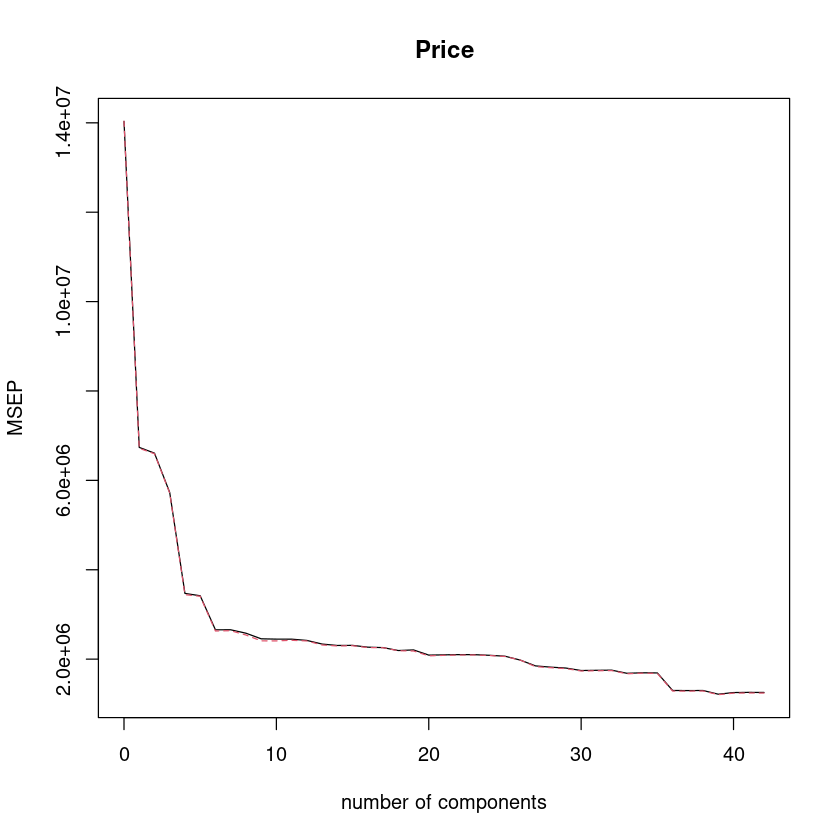

In [85]:
validationplot(pcr.fit, val.type="MSEP")


We can see that the minimum adjusted CV error (this is the bias corrected CV error, as per the PLS guide) occurs at **39** components

In [75]:
## Check on test set

x=model.matrix(Price~.,toyota.df)[,-1]
y=toyota.df$Price
y.test=y[test]

pcr.pred=predict(pcr.fit,x[test,],ncomp=39)
mean((pcr.pred-y.test)^2)

[1] 1995569

In [76]:
##Get final results using full data

pcr.fit=pcr(Price~.,data=toyota.df,scale=TRUE,ncomp=39) 
summary(pcr.fit)

Data: 	X dimension: 1436 42 
	Y dimension: 1436 1
Fit method: svdpc
Number of components considered: 39
TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        11.96    21.03    28.10    33.42    38.28    42.05    45.46    48.65
Price    54.17    54.18    63.67    78.35    78.42    81.21    81.31    81.92
       9 comps  10 comps  11 comps  12 comps  13 comps  14 comps  15 comps
X        51.71     54.71     57.52     60.26     62.90     65.46     67.95
Price    82.72     82.88     82.96     83.32     83.92     84.14     84.14
       16 comps  17 comps  18 comps  19 comps  20 comps  21 comps  22 comps
X         70.37     72.70     75.00     77.12     79.16     81.15     82.94
Price     84.25     84.27     84.55     85.18     85.44     85.45     86.03
       23 comps  24 comps  25 comps  26 comps  27 comps  28 comps  29 comps
X         84.65     86.31     87.92     89.38     90.79     92.04     93.22
Price     86.05     86.14 



# Conclusions/Recommendations on Part 2:





## Thoughts on Ridge vs. Lasso: 

We see that using ridge, for the optimal lambda, none of the variables have a 0 coefficient. However, for lasso, we see three variables: ColorBlue, Power Steering, and Radio have been reduced to 0. Relative to ridge, lasso will have lower variance but higher bias due to the exclusion of variables. However, the cross-validated MSE of ridge is lower than lasso, indicating that ridge regression performs better than lasso regression on this dataset.

The results for the lasso is also quite different than best subset. For best subset validation method, only 10 variables were selected, where as for lasso, most of the variables remained in the model.

## Final Recommendations: Ridge Vs. Lasso vs. PCR

Lets summarize all the best versions of our models and their test (MSE) score. I used the same train/test split method with the same random seed, as well as 10 folds for the Cross Validation, to ensure the results are comparable.

**Ridge: 1887376**

**Lasso: 2230717**

**PCR: 1995569**

We can see that they all perform similarly, although ridge seems to perform a little better than the rest.

For *PCR*, our optimal number of principle components was 39. This is very high. PCR method in general also has lacks from variable selection and thus its harder to interpret. As such, I will also not pick this method.

For *Lasso*, only 3 variables were excluded relative to the model with all variables, so the model interpretability doesn't really improve much relative to ridge, and the MSE is higher than Ridge and PCR. Thus, it doesn't make sense to pick this as the best model.

Based on these results, the best model out of the three tested for Part 2 of this analysis is ***Ridge*** regression. It provides the lowest MSE, and it only contains three extra variables compared to lasso regression, so the model intepretability is relatively comparable. 

Please note, that for Part 1, I was not able to figure out how to properly run cross-validation, and as such, I cannot compare models from Part 1 to models from Part 2!
